# TAXI TIP PREDICTION

# Importing Necessary Libraries


import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calander
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.style.use('ggplot')
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_erro
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy import stats

# Reading Data

In [81]:
data = pd.read_csv(r'C:\Users\Ash\Desktop\Sample\yellow_tripdata_2021-01.csv')

# Exploratory Data Analysis

In [92]:
data.shape

(1369765, 18)

In [93]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [95]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [96]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


In [97]:
data.isnull().sum()

VendorID                 98352
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          98352
trip_distance                0
RatecodeID               98352
store_and_fwd_flag       98352
PULocationID                 0
DOLocationID                 0
payment_type             98352
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [98]:
data.nunique()

VendorID                      2
tpep_pickup_datetime     939018
tpep_dropoff_datetime    935990
passenger_count               9
trip_distance              3787
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                258
DOLocationID                260
payment_type                  4
fare_amount                6017
extra                        91
mta_tax                       3
tip_amount                 2155
tolls_amount                307
improvement_surcharge         3
total_amount               8321
congestion_surcharge          5
dtype: int64

In [99]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.271413e+06,1.271413e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06
mean,1.676925e+00,1.411508e+00,4.631982e+00,1.035081e+00,1.652472e+02,1.614956e+02,1.280521e+00,1.209662e+01,9.705085e-01,4.930411e-01,1.918099e+00,2.477432e-01,2.969412e-01,1.747439e+01,2.116098e+00
std,4.676513e-01,1.059833e+00,3.939042e+02,5.994840e-01,6.783849e+01,7.210800e+01,4.916921e-01,1.291338e+01,1.231256e+00,7.632070e-02,2.597153e+00,1.672755e+00,4.222174e-02,1.469343e+01,9.287277e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.240000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.380000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.912000e+01,2.500000e+00
max,2.000000e+00,8.000000e+00,2.631633e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,8.250000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00


# Plot of Corelation Matrix

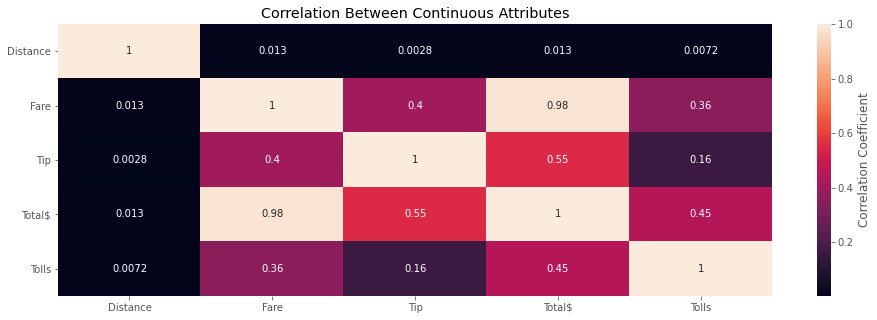

In [83]:
col = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'tolls_amount']
label = ['Distance', 'Fare', 'Tip', 'Total$','Tolls']

# plot correlation plot
fig, ax = plt.subplots(figsize=(16, 5))
corr_matrix = data[col].corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_xticklabels(label)
ax.set_yticklabels(label)
ax.set_title("Correlation Between Continuous Attributes")
plt.show()

In [84]:
sample = data[data['payment_type'] == 1].sample(frac=0.05, replace=True, random_state=30034).reset_index(drop=True)

In [85]:
COL = ['passenger_count', 'fare_amount', 'tip_amount', 'tolls_amount']
sample_filtered = sample.loc[:, COL].reset_index(drop=True)

# Split data to train and test

In [86]:
y = sample_filtered['tip_amount']
X_train, X_test, y_train, y_test = train_test_split(sample_filtered, y, test_size=0.3, random_state=0)

# Scaling for Data Normalization

In [87]:
xCOLS = ['fare_amount', 'tolls_amount']

scaler = StandardScaler()
X_train[xCOLS] = scaler.fit_transform(X_train[xCOLS])
X_test[xCOLS] = scaler.transform(X_test[xCOLS])

# Baseline model

In [88]:
baseline = ols(formula='tip_amount ~ 1', data=X_train).fit()
print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 04 Feb 2022   Prob (F-statistic):                nan
Time:                        21:58:27   Log-Likelihood:                -71256.
No. Observations:               32706   AIC:                         1.425e+05
Df Residuals:                   32705   BIC:                         1.425e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6292      0.012    222.426      0.0

In [89]:
base_train_pred = baseline.predict(X_train)
base_test_pred = baseline.predict(X_test)
train_rmse = mean_squared_error(y_train, base_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, base_test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 2.13771366468409
Test RMSE: 2.077868499005316


# Model Fit

In [90]:
full_model = ols(formula='tip_amount ~ passenger_count + fare_amount + tolls_amount', data=X_train).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     6572.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:59:13   Log-Likelihood:                -63540.
No. Observations:               32706   AIC:                         1.271e+05
Df Residuals:                   32702   BIC:                         1.271e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5708      0.015    1

# Predict and Evaluate

In [91]:
full_train_pred = full_model.predict(X_train)
full_test_pred = full_model.predict(X_test)
train_rmse = mean_squared_error(y_train, full_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, full_test_pred, squared=False)
train_r2 = r2_score(y_train, full_train_pred)
test_r2 = r2_score(y_test, full_test_pred)

print("Full model")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2", train_r2)
print("Test R2", test_r2)

Full model
Train RMSE: 1.6884827570573022
Test RMSE: 1.686076526189573
Train R2 0.3761298693506637
Test R2 0.3415245999665153


# Feature Creation

In [62]:
# extract day and time, the calculate the duration of the trip
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['date'] = data['tpep_pickup_datetime'].dt.normalize()
data['time'] = data['tpep_pickup_datetime'].dt.hour
data['weekday'] = data['date'].dt.day_name()
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'] / np.timedelta64(1, 'm')

In [63]:
# identifying holidays
cal = calander()
holidays = cal.holidays(start='2018-01-01', end='2018-12-31')
data['holiday'] = data['date'].isin(holidays)
data['week'] = data['date'].dt.dayofweek
data.loc[data['week'] >= 5, 'day_type'] = "weekend"
data.loc[data['week'] < 5, 'day_type'] = "workday"
data.loc[data['holiday'] == True, 'day_type'] = "holiday"
data = data.drop(['holiday', 'week'], axis=1)

# Transormation of Target Variable

In [64]:
data['tip_percent'] = (data.tip_amount / data.total_amount) * 100

In [65]:
# classify a trip's time slot

def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

data['time_desc'] = data['time'].apply(time_slots)

In [66]:
# drop features that we are not interested in
data = data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge'], axis=1)

In [67]:
# descriptive statistics for continuous attributes
data[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'duration', 'tip_percent']].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,duration,tip_percent
count,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369314e+06
mean,1.411508e+00,4.631982e+00,1.209662e+01,1.918099e+00,2.477432e-01,1.747439e+01,1.391168e+01,inf
std,1.059833e+00,3.939042e+02,1.291338e+01,2.597153e+00,1.672755e+00,1.469343e+01,1.312008e+02,NaN
min,0.000000e+00,0.000000e+00,-4.900000e+02,-1.000000e+02,-3.112000e+01,-4.928000e+02,-1.350846e+05,-6.600660e+01
25%,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.080000e+01,5.566667e+00,0.000000e+00
50%,1.000000e+00,1.700000e+00,8.500000e+00,1.860000e+00,0.000000e+00,1.380000e+01,9.066667e+00,1.383300e+01
75%,1.000000e+00,3.020000e+00,1.350000e+01,2.750000e+00,0.000000e+00,1.912000e+01,1.461667e+01,1.666667e+01
max,8.000000e+00,2.631633e+05,6.960500e+03,1.140440e+03,8.117500e+02,7.661280e+03,2.881770e+04,inf


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

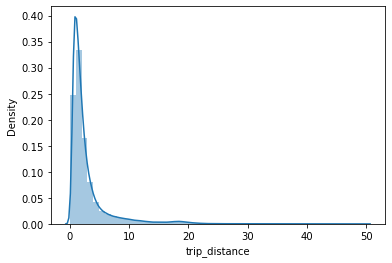

In [68]:
sns.distplot(data[(data['trip_distance'] > 0) & (data['trip_distance'] <= 50)]['trip_distance'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

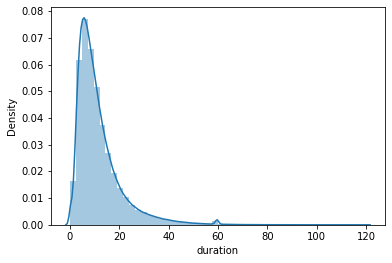

In [69]:
sns.distplot(data[(data['duration'] > 0) & (data['duration'] < 120)]['duration'])

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

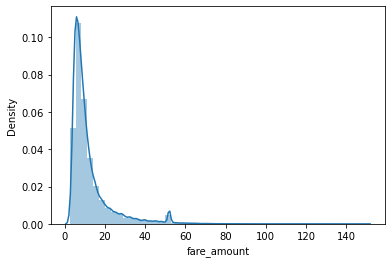

In [70]:
sns.distplot(data[(data['fare_amount'] >= 2.5)&(data['fare_amount'] <= 150)]['fare_amount'])

<AxesSubplot:xlabel='tip_amount', ylabel='Density'>

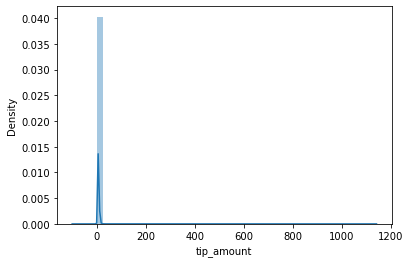

In [71]:
sns.distplot(data.tip_amount)

In [72]:
# remove invalid data
# passenger == 0
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] < 7)]

# trip_distance <= 0
data = data[(data['trip_distance'] > 0) & (data['trip_distance'] <= 100)]

# exclude duration longer than 180 mins
data = data[(data['duration'] > 0) & (data['duration'] <= 180)]

# payment method other than cash and credit card
data = data[(data['payment_type'] != 3) & (data['payment_type'] != 4) & (data['payment_type'] != 5) & (data['payment_type'] != 6)]

# exclude instances with fare amount less than 2.5
data = data[(data['fare_amount'] >= 2.5) & (data['fare_amount'] <= 250)]

# remove trips with tip precentage over 50%
data = data[(data['tip_percent'] >= 0) & (data['tip_percent'] <= 50)]

# PU and DO location id not within NYC taxi zone
data = data[(data['PULocationID'] >= 1) & (data['PULocationID'] <= 263) & (data['DOLocationID'] >= 1) & (data['DOLocationID'] <= 263)]

In [73]:
# convert passenger amount into three level
def passenger_convert(row):
    if (row >= 1) & (row <= 2):
        val = "small"
    elif (row > 2) & (row < 5):
        val = "medium"
    else:
        val = "high"
    return val

data['passenger_count'] = data['passenger_count'].apply(passenger_convert)

In [74]:
data['passenger_count'].value_counts()

small     1082980
medium      58677
high        55244
Name: passenger_count, dtype: int64

# Passengers Tipping Behavior

In [76]:
# filter payment type cash, since tips are not recorded in cash payment
tip = data[data['payment_type'] != 2]

In [ ]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#winter_pu_count = pd.crosstab(yellow_winter['weekday'], yellow_winter['time'])
#winter_pu_count = winter_pu_count.reindex(cats, axis=0)

#summer_pu_count = pd.crosstab(yellow_summer['weekday'], yellow_summer['time'])
#summer_pu_count = summer_pu_count.reindex(cats, axis=0)

# Computing the tipping percentage in each hour through the week

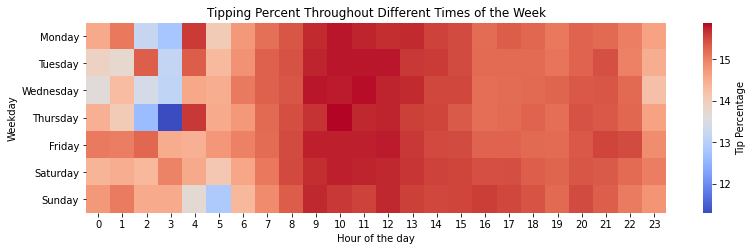

In [78]:
tip_percent = tip.groupby(['weekday', 'time'], as_index=False)['tip_percent'].mean()
tip_percent.weekday = pd.Categorical(tip_percent.weekday, categories=cats)
tip_percent = tip_percent.sort_values(['weekday', 'time']).reset_index(drop=True)
tip_percent_heatmap = pd.pivot_table(tip_percent, values='tip_percent', index='weekday', columns='time')

fig, ax = plt.subplots(figsize=(13, 3.5))
sns.heatmap(tip_percent_heatmap, cbar_kws={'label': 'Tip Percentage'}, ax=ax, cmap='coolwarm')
ax.set_ylabel('Weekday')
ax.set_xlabel('Hour of the day')
ax.set_title('Tipping Percent Throughout Different Times of the Week')
plt.show()

In [ ]:
##PART 2

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Ash\Desktop\Sample\yellow_tripdata_2021-01.csv')

C:\Users\Ash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
'''Keep aside test data first'''

def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


df_trn_val,df_tst = mydf_splitter(df,1150)

print(df_trn_val.shape,df_tst.shape)

In [ ]:
 #Dropping the columns
df_trn_val1 = df_trn_val.drop(["congestion_surcharge","store_and_fwd_flag"],axis = 1)
print(df_trn_val1.shape)
df_trn_val1.head(3)

In [ ]:
#Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [4]:
'''Define impute functions. Impute categorical NaNs with -1, 
where we add 1 to make it 0. For each 
continuous variables, we impute missing values with median values of that
column, and for every variable
where any rows were imputed, add a separate 'imputed or not' column'''

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [5]:
df_trn_val2 = str_to_cat(df_trn_val1)
print(df_trn_val2.shape)
df_trn_val2.head(3)

NameError: name 'str_to_cat' is not defined

In [ ]:
df_trn_val3,my_table = mydf_preprocessor(df_trn_val2,null_table = None)
print(df_trn_val3.shape)
df_trn_val3.head(3)

In [ ]:
x = df_trn_val3.drop('improvement_surcharge', axis=1)
y = df_trn_val3['improvement_surcharge']

In [ ]:
x_trn, x_val, y_trn, y_val = train_test_split(x, y, random_state=1)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# RandomforestRegressor

In [ ]:
#(n_estimators = 10)

mod_1 = RandomForestRegressor(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
mod_1.fit(x_trn,y_trn)

In [ ]:
y_pred = mod_1.predict(x_val)
y_pred.shape

In [ ]:
from sklearn import metrics
import numpy as np
print (f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_val,y_prd)}')
print(f'Mean Squared Error (MSE) : {metrics.mean_squared_error(y_val,y_prd)}')
print(f'Root Mean Squared Error (RMSE) : {np.sqrt(metrics.mean_squared_error(y_val,y_prd))}')

In [ ]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 2, verbose=2, random_state=0,n_jobs = -1)
# Fit the random search model
rf_random.fit(x_trn,y_trn)

In [ ]:
y_pred_2 = rf_random.predict(x_val)
y_pred_2.shape

# Randomized Grid CV

In [ ]:
#Getting the results in Dataframe
random_sear_pd=pd.DataFrame(rf_random.cv_results_)
random_sear_pd

In [ ]:
rf_random.best_params_
rf_random.best_score_
rf_random.best_estimator_

In [ ]:
print (f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_val,y_pred_2)}')
print(f'Mean Squared Error (MSE) : {metrics.mean_squared_error(y_val,y_pred_2)}')
print(f'Root Mean Squared Error (RMSE) : {np.sqrt(metrics.mean_squared_error(y_val,y_pred_2))}')

# PART 1
i)Conducted exploratory analysis of the data
ii)Important features for prediction are trip_distance,fare_amount,tip_amount,total_amount and tolls_amount
iii)Features represented are transformed a) day_type as holiday and weekday
                                         b)day_time as morning evening, night
iv)Yes, it is useful to transform the output variable. 
Formula : data['tip_percent'] = (data.tip_amount / data.total_amount) *100 for calculation. 
It makes more sense to predict the tip percentage for easier representation

# PART2
i) Data is split into train and test portions.Pipeline is builtso that all models are trained on the training set and comparisons among models are performed
on the validation set.
ii) Since the model involves continous variables, randomforest classifier cannot be implemeted and hence deployed randomforest regressor.
iii) Implemeted feature engineering to get insight for important features at different level of granulity

# CONCLUSION
Thus all the requirements for the assignment are fulfilled.
a)EDA is performed
b)Baseline model is implemented using OLS
c)Feature tranformation is deployed.
d)Taxi Tip as target variable is calculated using formula as mentioned above
e)Passengers Tipping Behavior is calculated
f)Pipeline model is implemented.